# MAE calculations with regressioon and decision tree

## Libraries

In [200]:
# calculating, drawing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# training, results
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# regressors
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.linear_model import RidgeCV
#from sklearn.model_selection import RepeatedKFold

# warnings
import warnings
warnings.filterwarnings('ignore')

## Data and cleaning

In [201]:
# load training and test data
train =  pd.read_csv('df_train_DR2.csv')
test = pd.read_csv('df_test_DR2.csv')

In [202]:
train.shape

(8592, 30)

In [203]:
test.shape

(168, 23)

In [204]:
pd.set_option('display.max_columns', 500)
train.head()

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,y_original,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday,y_imp,y_imp_r2,y_imp_r3,y_imp_log,y_imp_r2_log,y_imp_r3_log
0,0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577,2021-09-01,2021,9,2,Wednesday,no,0,Autumn,not_hol,not_hol,0.577001,0.577001,0.577001,-0.549911,-0.549911,-0.549911
1,1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594,2021-09-01,2021,9,2,Wednesday,no,1,Autumn,not_hol,not_hol,0.594001,0.585501,0.594001,-0.520874,-0.535287,-0.520874
2,2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685,2021-09-01,2021,9,2,Wednesday,no,2,Autumn,not_hol,not_hol,0.685001,0.639501,0.618668,-0.378335,-0.447067,-0.480187
3,3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016,2021-09-01,2021,9,2,Wednesday,no,3,Autumn,not_hol,not_hol,1.016001,0.850501,0.765001,0.015874,-0.161930,-0.267878
4,4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677,2021-09-01,2021,9,2,Wednesday,no,4,Autumn,not_hol,not_hol,0.677001,0.846501,0.792668,-0.390083,-0.166644,-0.232351


In [205]:
test.head()

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday
0,0,2022-08-25 00:00:00+03:00,21.1,15.2,69.0,0.0,0.0,340.0,9.0,9.3,1022.0,2.0,0.25533,2022-08-25,2022,8,3,Thursday,no,0,Summer,not_hol,not_hol
1,1,2022-08-25 01:00:00+03:00,20.1,15.1,73.0,0.0,0.0,30.0,6.0,14.8,1022.0,2.0,0.19492,2022-08-25,2022,8,3,Thursday,no,1,Summer,not_hol,not_hol
2,2,2022-08-25 02:00:00+03:00,20.1,15.1,73.0,0.0,0.0,320.0,7.0,13.0,1022.0,2.0,0.18853,2022-08-25,2022,8,3,Thursday,no,2,Summer,not_hol,not_hol
3,3,2022-08-25 03:00:00+03:00,18.7,17.0,90.0,0.0,0.0,0.0,4.0,11.1,1022.4,4.0,0.19947,2022-08-25,2022,8,3,Thursday,no,3,Summer,not_hol,not_hol
4,4,2022-08-25 04:00:00+03:00,18.1,17.1,94.0,0.0,0.0,280.0,7.0,11.1,1022.0,3.0,0.21192,2022-08-25,2022,8,3,Thursday,no,4,Summer,not_hol,not_hol


In [206]:
# check 'coco' unique values (there were a number of nan's in initial dataset)
train.coco.unique()

array([ 2.,  1.,  4.,  3., 17.,  7., 18.,  5., 25.,  8.,  9., 15., 13.,
       12., 14.,  6., 10., 21., 22., 19., 16., 20., 23.])

In [207]:
# check null values
train.isnull().sum()
# y_imp is y_original where missing values were replaced

Unnamed: 0      0
time            0
temp            0
dwpt            0
rhum            0
prcp            0
snow            0
wdir            0
wspd            0
wpgt            0
pres            0
coco            0
el_price        0
y_original      2
date            0
year            0
month           0
dow             0
dayname         0
weekend         0
hour            0
season          0
h_type          0
is_holiday      0
y_imp           0
y_imp_r2        0
y_imp_r3        0
y_imp_log       0
y_imp_r2_log    0
y_imp_r3_log    0
dtype: int64

In [208]:
# check where y-original nans are
pd.set_option('display.max_rows', 200)
train[train['y_original'].isna()]

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,y_original,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday,y_imp,y_imp_r2,y_imp_r3,y_imp_log,y_imp_r2_log,y_imp_r3_log
1444,1444,2021-10-31 03:00:00+02:00,7.1,5.2,88.0,0.0,0.0,180.0,10.8,18.5,1015.2,1.0,0.06003,NaN,2021-10-31,2021,10,6,Sunday,yes,3,Autumn,not_hol,not_hol,1.169001,1.448001,1.171001,0.156150,0.370184,0.157859
4972,4972,2022-03-27 04:00:00+03:00,-2.7,-10.5,55.0,0.0,0.0,330.0,14.4,38.9,1020.6,2.0,0.10007,NaN,2022-03-27,2022,3,6,Sunday,yes,4,Spring,not_hol,not_hol,1.033501,1.039751,1.024501,0.032952,0.038981,0.024206


In [209]:
# check what's around these nans, especially what is y_imp value there. will use y_imp for training.
train.iloc[[1443, 1444, 1445, 4971, 4972, 4973]]

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,y_original,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday,y_imp,y_imp_r2,y_imp_r3,y_imp_log,y_imp_r2_log,y_imp_r3_log
1443,1443,2021-10-31 03:00:00+03:00,6.8,4.8,87.0,0.0,0.0,180.0,7.2,18.5,1015.9,1.0,0.06006,1.727,2021-10-31,2021,10,6,Sunday,yes,3,Autumn,not_hol,not_hol,1.727001,1.172001,1.176668,0.546386,0.158713,0.162686
1444,1444,2021-10-31 03:00:00+02:00,7.1,5.2,88.0,0.0,0.0,180.0,10.8,18.5,1015.2,1.0,0.06003,NaN,2021-10-31,2021,10,6,Sunday,yes,3,Autumn,not_hol,not_hol,1.169001,1.448001,1.171001,0.156150,0.370184,0.157859
1445,1445,2021-10-31 04:00:00+02:00,7.2,5.3,88.0,0.0,0.0,180.0,10.8,18.5,1014.8,1.0,0.05711,0.611,2021-10-31,2021,10,6,Sunday,yes,4,Autumn,not_hol,not_hol,0.611001,0.890001,1.169001,-0.492657,-0.116533,0.156150
4971,4971,2022-03-27 02:00:00+02:00,-2.2,-9.4,58.0,0.0,0.0,330.0,18.0,42.6,1020.0,3.0,0.05312,1.046,2022-03-27,2022,3,6,Sunday,yes,2,Spring,not_hol,not_hol,1.046001,1.020001,0.968668,0.044974,0.019804,-0.031834
4972,4972,2022-03-27 04:00:00+03:00,-2.7,-10.5,55.0,0.0,0.0,330.0,14.4,38.9,1020.6,2.0,0.10007,NaN,2022-03-27,2022,3,6,Sunday,yes,4,Spring,not_hol,not_hol,1.033501,1.039751,1.024501,0.032952,0.038981,0.024206
4973,4973,2022-03-27 05:00:00+03:00,-3.3,-11.1,55.0,0.0,0.0,330.0,10.8,37.0,1021.3,2.0,0.04704,1.021,2022-03-27,2022,3,6,Sunday,yes,5,Spring,not_hol,not_hol,1.021001,1.027251,1.033501,0.020784,0.026886,0.032952


In [210]:
# this method was used to fill 'coco' nans
# train["coco"].fillna( method ='ffill', inplace = True)

In [211]:
# create separate train_y dataframe, where all the y's will be

train_y_sel = train[['y_original', 'y_imp',	'y_imp_r2',	'y_imp_r3',	'y_imp_log',	'y_imp_r2_log',	'y_imp_r3_log']].copy()
train_y_sel.head()

,y_original,y_imp,y_imp_r2,y_imp_r3,y_imp_log,y_imp_r2_log,y_imp_r3_log
0,0.577,0.577001,0.577001,0.577001,-0.549911,-0.549911,-0.549911
1,0.594,0.594001,0.585501,0.594001,-0.520874,-0.535287,-0.520874
2,0.685,0.685001,0.639501,0.618668,-0.378335,-0.447067,-0.480187
3,1.016,1.016001,0.850501,0.765001,0.015874,-0.161930,-0.267878
4,0.677,0.677001,0.846501,0.792668,-0.390083,-0.166644,-0.232351


In [212]:
# create separate train_x dataframe, without y's
train_x = train.copy()
train_x = train_x.drop(['y_original', 'y_imp',	'y_imp_r2',	'y_imp_r3',	'y_imp_log',	'y_imp_r2_log',	'y_imp_r3_log'], axis=1)
train_x.head()

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday
0,0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,2021-09-01,2021,9,2,Wednesday,no,0,Autumn,not_hol,not_hol
1,1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,2021-09-01,2021,9,2,Wednesday,no,1,Autumn,not_hol,not_hol
2,2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,2021-09-01,2021,9,2,Wednesday,no,2,Autumn,not_hol,not_hol
3,3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,2021-09-01,2021,9,2,Wednesday,no,3,Autumn,not_hol,not_hol
4,4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,2021-09-01,2021,9,2,Wednesday,no,4,Autumn,not_hol,not_hol


In [213]:
# join train_x and test (temporarily) to do some preprocessing for 'get dummies'
train_temp = train_x
train_temp['train']=1
test_temp = test
test_temp['train']=0
train_test=pd.concat([train_temp,test_temp])
train_test.head()

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday,train
0,0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,2021-09-01,2021,9,2,Wednesday,no,0,Autumn,not_hol,not_hol,1
1,1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,2021-09-01,2021,9,2,Wednesday,no,1,Autumn,not_hol,not_hol,1
2,2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,2021-09-01,2021,9,2,Wednesday,no,2,Autumn,not_hol,not_hol,1
3,3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,2021-09-01,2021,9,2,Wednesday,no,3,Autumn,not_hol,not_hol,1
4,4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,2021-09-01,2021,9,2,Wednesday,no,4,Autumn,not_hol,not_hol,1


In [214]:
train_test.shape

(8760, 24)

In [215]:
# remove columns I'll not use
train_test = train_test.drop(columns=['Unnamed: 0', 'time', 'date', 'year', 'dow', 'is_holiday'])
train_test.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,month,dayname,weekend,hour,season,h_type,train
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,9,Wednesday,no,0,Autumn,not_hol,1
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,9,Wednesday,no,1,Autumn,not_hol,1
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,9,Wednesday,no,2,Autumn,not_hol,1
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,9,Wednesday,no,3,Autumn,not_hol,1
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,9,Wednesday,no,4,Autumn,not_hol,1


In [216]:
# change values in 'coco' (condition code) to enable dummies
coco = {1:	'Clear', 2:'Fair', 3:'Cloudy', 4:'Overcast', 5: 'Fog', 6: 'Freezing_Fog', 7:	'Light_Rain', 8:	'Rain', 9:	'Heavy_Rain', 10:	'Freezing_Rain', 11:	'Heavy_Freezing_Rain', 12:	'Sleet',
     13:	'Heavy_Sleet', 14:	'Light_Snowfall', 15:	'Snowfall', 16:	'Heavy_Snowfall', 17:	'Rain_Shower', 18:	'Heavy_Rain_Shower', 19:	'Sleet_Shower', 20:	'Heavy_Sleet_Shower', 21:	'Snow_Shower',
     22:	'Heavy_Snow_Shower', 23:	'Lightning', 24:	'Hail', 25:	'Thunderstorm', 26:	'Heavy_Thunderstorm', 27:	'Storm'}

train_test['coco'] = train_test['coco'].map(coco)
train_test.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,month,dayname,weekend,hour,season,h_type,train
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,Fair,0.09016,9,Wednesday,no,0,Autumn,not_hol,1
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,Fair,0.09251,9,Wednesday,no,1,Autumn,not_hol,1
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,Fair,0.08890,9,Wednesday,no,2,Autumn,not_hol,1
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,Clear,0.08735,9,Wednesday,no,3,Autumn,not_hol,1
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,Fair,0.08688,9,Wednesday,no,4,Autumn,not_hol,1


In [217]:
# same with months
mnth = {1:	'January', 2:'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7:	'July', 8:	'August', 9:	'September', 10:	'October', 11:	'November', 12:	'December'}

train_test['month'] = train_test['month'].map(mnth)
train_test.head()


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,month,dayname,weekend,hour,season,h_type,train
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,Fair,0.09016,September,Wednesday,no,0,Autumn,not_hol,1
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,Fair,0.09251,September,Wednesday,no,1,Autumn,not_hol,1
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,Fair,0.08890,September,Wednesday,no,2,Autumn,not_hol,1
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,Clear,0.08735,September,Wednesday,no,3,Autumn,not_hol,1
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,Fair,0.08688,September,Wednesday,no,4,Autumn,not_hol,1


In [218]:
train_test.isnull().sum()

temp        0
dwpt        0
rhum        0
prcp        0
snow        0
wdir        0
wspd        0
wpgt        0
pres        0
coco        0
el_price    0
month       0
dayname     0
weekend     0
hour        0
season      0
h_type      0
train       0
dtype: int64

In [219]:
# get dummies
train_test=pd.get_dummies(train_test)
train_test.head()


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,el_price,hour,train,coco_Clear,coco_Cloudy,coco_Fair,coco_Fog,coco_Freezing_Fog,coco_Freezing_Rain,coco_Heavy_Rain,coco_Heavy_Rain_Shower,coco_Heavy_Sleet,coco_Heavy_Sleet_Shower,coco_Heavy_Snow_Shower,coco_Heavy_Snowfall,coco_Light_Rain,coco_Light_Snowfall,coco_Lightning,coco_Overcast,coco_Rain,coco_Rain_Shower,coco_Sleet,coco_Sleet_Shower,coco_Snow_Shower,coco_Snowfall,coco_Thunderstorm,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday,weekend_no,weekend_yes,season_Autumn,season_Spring,season_Summer,season_Winter,h_type_1_sthol,h_type_2_nathol,h_type_3_natday,h_type_4_shortday,h_type_not_hol
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,0.09016,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,0.09251,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,0.08890,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,0.08735,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,0.08688,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1


In [220]:
train_test.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,el_price,hour,train,coco_Clear,coco_Cloudy,coco_Fair,coco_Fog,coco_Freezing_Fog,coco_Freezing_Rain,coco_Heavy_Rain,coco_Heavy_Rain_Shower,coco_Heavy_Sleet,coco_Heavy_Sleet_Shower,coco_Heavy_Snow_Shower,coco_Heavy_Snowfall,coco_Light_Rain,coco_Light_Snowfall,coco_Lightning,coco_Overcast,coco_Rain,coco_Rain_Shower,coco_Sleet,coco_Sleet_Shower,coco_Snow_Shower,coco_Snowfall,coco_Thunderstorm,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday,weekend_no,weekend_yes,season_Autumn,season_Spring,season_Summer,season_Winter,h_type_1_sthol,h_type_2_nathol,h_type_3_natday,h_type_4_shortday,h_type_not_hol
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.963995,2.703984,77.033219,0.019395,26.110731,200.886416,9.152249,20.750320,1013.286986,0.164664,11.500000,0.980822,0.214954,0.138927,0.202169,0.029224,0.000228,0.002055,0.002397,0.014384,0.000228,0.000114,0.001142,0.000114,0.071347,0.087557,0.000228,0.177626,0.010731,0.021233,0.005479,0.001484,0.011872,0.004338,0.002169,0.082192,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084817,0.084932,0.082192,0.085046,0.082192,0.142466,0.142466,0.142466,0.142466,0.142466,0.142466,0.145205,0.715068,0.284932,0.249429,0.251941,0.252055,0.246575,0.030137,0.002740,0.035616,0.010959,0.920548
std,9.329534,8.267427,17.502334,0.251207,51.128818,88.683256,4.837025,9.943927,12.491139,0.126000,6.922582,0.137158,0.410814,0.345890,0.401640,0.168443,0.015109,0.045286,0.048906,0.119073,0.015109,0.010684,0.033770,0.010684,0.257418,0.282666,0.015109,0.382219,0.103037,0.144168,0.073824,0.038497,0.108317,0.065723,0.046524,0.274672,0.278796,0.278796,0.266150,0.278796,0.278796,0.274672,0.278626,0.278796,0.274672,0.278966,0.274672,0.349547,0.349547,0.349547,0.349547,0.349547,0.349547,0.352328,0.451408,0.451408,0.432707,0.434152,0.434217,0.431042,0.170974,0.052274,0.185342,0.104116,0.270458
min,-26.100000,-28.700000,20.000000,0.000000,0.000000,0.000000,0.000000,2.900000,962.600000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,-2.900000,66.000000,0.000000,0.000000,140.000000,7.200000,13.000000,1006.700000,0.093127,5.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [221]:
# normalize data
train_test=(train_test-train_test.min())/(train_test.max()-train_test.min())
train_test.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,el_price,hour,train,coco_Clear,coco_Cloudy,coco_Fair,coco_Fog,coco_Freezing_Fog,coco_Freezing_Rain,coco_Heavy_Rain,coco_Heavy_Rain_Shower,coco_Heavy_Sleet,coco_Heavy_Sleet_Shower,coco_Heavy_Snow_Shower,coco_Heavy_Snowfall,coco_Light_Rain,coco_Light_Snowfall,coco_Lightning,coco_Overcast,coco_Rain,coco_Rain_Shower,coco_Sleet,coco_Sleet_Shower,coco_Snow_Shower,coco_Snowfall,coco_Thunderstorm,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday,weekend_no,weekend_yes,season_Autumn,season_Spring,season_Summer,season_Winter,h_type_1_sthol,h_type_2_nathol,h_type_3_natday,h_type_4_shortday,h_type_not_hol
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.575026,0.633145,0.712915,0.002455,0.118685,0.558018,0.288714,0.297010,0.597020,0.041149,0.500000,0.980822,0.214954,0.138927,0.202169,0.029224,0.000228,0.002055,0.002397,0.014384,0.000228,0.000114,0.001142,0.000114,0.071347,0.087557,0.000228,0.177626,0.010731,0.021233,0.005479,0.001484,0.011872,0.004338,0.002169,0.082192,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084817,0.084932,0.082192,0.085046,0.082192,0.142466,0.142466,0.142466,0.142466,0.142466,0.142466,0.145205,0.715068,0.284932,0.249429,0.251941,0.252055,0.246575,0.030137,0.002740,0.035616,0.010959,0.920548
std,0.162253,0.166682,0.218779,0.031798,0.232404,0.246342,0.152588,0.165456,0.147128,0.031501,0.300982,0.137158,0.410814,0.345890,0.401640,0.168443,0.015109,0.045286,0.048906,0.119073,0.015109,0.010684,0.033770,0.010684,0.257418,0.282666,0.015109,0.382219,0.103037,0.144168,0.073824,0.038497,0.108317,0.065723,0.046524,0.274672,0.278796,0.278796,0.266150,0.278796,0.278796,0.274672,0.278626,0.278796,0.274672,0.278966,0.274672,0.349547,0.349547,0.349547,0.349547,0.349547,0.349547,0.352328,0.451408,0.451408,0.432707,0.434152,0.434217,0.431042,0.170974,0.052274,0.185342,0.104116,0.270458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.462609,0.520161,0.575000,0.000000,0.000000,0.388889,0.227129,0.168053,0.519435,0.023265,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [222]:
# separate train and test sets
train_x_df=train_test[train_test['train']==1]
test_df=train_test[train_test['train']==0]
train_x_df=train_x_df.drop(['train'],axis=1)
test_df=test_df.drop(['train'],axis=1)

In [223]:
test_df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,el_price,hour,coco_Clear,coco_Cloudy,coco_Fair,coco_Fog,coco_Freezing_Fog,coco_Freezing_Rain,coco_Heavy_Rain,coco_Heavy_Rain_Shower,coco_Heavy_Sleet,coco_Heavy_Sleet_Shower,coco_Heavy_Snow_Shower,coco_Heavy_Snowfall,coco_Light_Rain,coco_Light_Snowfall,coco_Lightning,coco_Overcast,coco_Rain,coco_Rain_Shower,coco_Sleet,coco_Sleet_Shower,coco_Snow_Shower,coco_Snowfall,coco_Thunderstorm,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday,weekend_no,weekend_yes,season_Autumn,season_Spring,season_Summer,season_Winter,h_type_1_sthol,h_type_2_nathol,h_type_3_natday,h_type_4_shortday,h_type_not_hol
count,168.000000,168.000000,168.000000,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.0,168.000000,168.000000,168.0,168.0,168.0,168.0,168.000000,168.0,168.000000,168.000000,168.0,168.000000,168.0,168.0,168.0,168.0,168.000000,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0
mean,0.770518,0.857119,0.725446,0.035865,0.0,0.461723,0.282090,0.195438,0.631696,0.089996,0.500000,0.255952,0.154762,0.178571,0.125000,0.0,0.0,0.023810,0.077381,0.0,0.0,0.0,0.0,0.011905,0.0,0.005952,0.130952,0.0,0.011905,0.0,0.0,0.0,0.0,0.023810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.714286,0.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.089611,0.071158,0.207020,0.144104,0.0,0.337587,0.168372,0.115664,0.048140,0.057185,0.301864,0.437700,0.362759,0.384138,0.331708,0.0,0.0,0.152911,0.267994,0.0,0.0,0.0,0.0,0.108782,0.0,0.077152,0.338357,0.0,0.108782,0.0,0.0,0.0,0.0,0.152911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350973,0.350973,0.350973,0.350973,0.350973,0.350973,0.350973,0.453104,0.453104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.594783,0.679435,0.087500,0.000000,0.0,0.000000,0.000000,0.043261,0.558304,0.001720,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.715652,0.842742,0.612500,0.000000,0.0,0.194444,0.161672,0.106489,0.581861,0.047564,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.761739,0.875000,0.787500,0.000000,0.0,0.333333,0.220820,0.168053,0.628975,0.074576,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.820870,0.903226,0.881250,0.000000,0.0,0.861111,0.347003,0.259567,0.664900,0.140542,0.750000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.975652,0.963710,1.000000,0.848101,0.0,1.000000,0.820189,0.505824,0.713781,0.199978,1.000000,1.000000,1.000000,1.000000,1.000000,0.0

In [224]:
train_x_df.shape

(8592, 64)

In [225]:
test_df.shape

(168, 64)

## Linear regression

In [226]:
# perform calculations for different y's
y_sel = ['y_imp',	'y_imp_r2',	'y_imp_r3',	'y_imp_log',	'y_imp_r2_log',	'y_imp_r3_log']
for i in range(len(y_sel)):
  y_lr = train_y_sel[y_sel[i]]
  X_lr = train_x_df
  train_X, val_X, train_y, val_y = train_test_split(X_lr, y_lr,random_state=0, test_size = 0.20)

  model_lr = LinearRegression()
  model_lr.fit(train_X, train_y)
  val_predictions_lr = model_lr.predict(val_X)

  print(f'{y_sel[i]}: {mean_absolute_error(val_y, val_predictions_lr)}')

y_imp: 0.6097965264007054
y_imp_r2: 0.5350738557391653
y_imp_r3: 0.49777131847564626
y_imp_log: 0.6039892889117107
y_imp_r2_log: 0.5324693853504413
y_imp_r3_log: 0.4691905373167375


LR model for all the training data

In [227]:
# create LR model for all the training data
y_lr = train_y_sel['y_imp_r3']
X_lr = train_x_df

model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr) #siin ei ole nüüd seda train-test splitti

test_y_ennustused_lr = model_lr.predict(test_df)


In [228]:
submission_lr_r3_all = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_lr},
    columns = ['time', 'consumption'])
#submission_lr_r3_all.to_csv('submission_lr_r3_all.csv', index = False)

LR model for data starting from 01 May 2022.

In [229]:
# find starting index
train.iloc[[5808]]

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,y_original,date,year,month,dow,dayname,weekend,hour,season,h_type,is_holiday,y_imp,y_imp_r2,y_imp_r3,y_imp_log,y_imp_r2_log,y_imp_r3_log
5808,5808,2022-05-01 00:00:00+03:00,4.0,-1.6,67.0,0.0,0.0,200.0,3.6,11.1,1023.7,2.0,0.16525,0.214,2022-05-01,2022,5,6,Sunday,yes,0,Spring,1_sthol,hol,0.214001,0.245501,0.610001,-1.541775,-1.404454,-0.494295


In [230]:
# create new dataframe from 01 May
y_lr_2 = train_y_sel['y_imp_r3'].loc[5808:]
X_lr_2 = train_x_df.loc[5808:]


In [231]:
# perform calculations for different y's
y_sel = ['y_imp',	'y_imp_r2',	'y_imp_r3',	'y_imp_log',	'y_imp_r2_log',	'y_imp_r3_log']
for i in range(len(y_sel)):
  y_lr_2 = train_y_sel[y_sel[i]].loc[5808:]
  X_lr_2 = train_x_df.loc[5808:]
  train_X, val_X, train_y, val_y = train_test_split(X_lr_2, y_lr_2,random_state=0, test_size = 0.20)

  model_lr = LinearRegression()
  model_lr.fit(train_X, train_y)
  val_predictions_lr = model_lr.predict(val_X)

  print(f'{y_sel[i]}: {mean_absolute_error(val_y, val_predictions_lr)}')

y_imp: 0.44527063395968364
y_imp_r2: 0.3665299663431047
y_imp_r3: 0.3135672094608192
y_imp_log: 0.6442056250119813
y_imp_r2_log: 0.5359142529259336
y_imp_r3_log: 0.4501120783575186


In [232]:
# perform calculations for different time periods
periods = np.arange(0, 8500, 100)
results = []
for i in range(len(periods)):
  y_lr_3 = train_y_sel['y_imp_r3'].loc[periods[i]:]
  X_lr_3 = train_x_df.loc[periods[i]:]
  train_X, val_X, train_y, val_y = train_test_split(X_lr_3, y_lr_3,random_state=0, test_size = 0.20)

  model_lr = LinearRegression()
  model_lr.fit(train_X, train_y)
  val_predictions_lr = model_lr.predict(val_X)
  error = mean_absolute_error(val_y, val_predictions_lr)
  results.append(error)
  #print(f'{mean_absolute_error(val_y, val_predictions_lr)}')
results

[0.49777131847564626,
 57695314.99472378,
 34496458.89080891,
 50263709.56389491,
 0.5238157847518814,
 618858217.7955292,
 740029926.0784006,
 353939320.8386973,
 0.5035031112625619,
 1430053245.1790998,
 0.49742543630678104,
 396755279.9789646,
 294408884.3409621,
 24576476.687820885,
 0.5295446220498748,
 0.4931248351980829,
 0.4853558620964382,
 47918420.47820874,
 0.50048445853101,
 0.4811808344924698,
 232239959.1638666,
 96682627.49798788,
 2899499894.28051,
 447797689.03878665,
 0.4715042661491618,
 0.48702522871440923,
 0.45138744554347904,
 29642663.19807773,
 0.4671429096563132,
 0.4821038271870201,
 0.4530174625037239,
 0.46554317582842675,
 24963482489.0577,
 402696153.0172114,
 18238132.847970627,
 29558918.552175917,
 0.4408493824138986,
 8409117.81967308,
 0.446799400916192,
 0.42093874884074406,
 0.42607587264360186,
 0.40430287345333576,
 0.38147354495816377,
 1305746465.9992273,
 0.3912142577991748,
 0.36918688226483964,
 0.39235316314621355,
 0.3981615337901602,
 0.

In [233]:
# Kaggle submission LR r3 from index 8300
y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]
model_lr = LinearRegression()
model_lr.fit(X_lr_2, y_lr_2) 

test_y_ennustused_lr = model_lr.predict(test_df)

submission_lr_r3_8300 = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_lr},
    columns = ['time', 'consumption'])
#submission_lr_r3_8300.to_csv('submission_lr_r3_8300.csv', index = False)

Kaggle'i tulemuseks andis 0.3544.

## Ridge, Lasso and ElasticNet regressions

In [234]:
# calculate mae's for ridge, lasso and elasticnet, y_imp_r3 and index 8300->
lambda_ = 1

y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]
train_X, val_X, train_y, val_y = train_test_split(X_lr_2, y_lr_2,random_state=0, test_size = 0.20)

lr = LinearRegression()
lr_ridge = Ridge(lambda_)
lr_lasso = Lasso(lambda_)
lr_elastic = ElasticNet(alpha = lambda_)

lr.fit(train_X, train_y)
lr_ridge.fit(train_X, train_y)
lr_lasso.fit(train_X, train_y)
lr_elastic.fit(train_X, train_y)

predict_lr = lr.predict(val_X)
predict_ridge = lr_ridge.predict(val_X)
predict_lasso = lr_lasso.predict(val_X)
predict_elastic = lr_elastic.predict(val_X)

In [235]:
mae_lrr = mean_absolute_error(val_y, predict_lr)
print(f'Validation set LR MAE is {mae_lrr}.')

mae_ridge = mean_absolute_error(val_y, predict_ridge)
print(f'Validation set ridge MAE is {mae_ridge}.')

mae_lasso = mean_absolute_error(val_y, predict_lasso)
print(f'Validation set lasso MAE is {mae_lasso}.')

mae_elastic = mean_absolute_error(val_y, predict_elastic)
print(f'Validation set elasticnet MAE is {mae_elastic}.')


Validation set LR MAE is 0.19542164022267947.
Validation set ridge MAE is 0.1817371141539596.
Validation set lasso MAE is 0.2804016633932252.
Validation set elasticnet MAE is 0.2804016633932252.


**Ridge tuning**

In [236]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(train_X, train_y)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.27185882427329455}
0.36296919768432495


In [237]:
lr_ridge_2 = Ridge(alpha = 0.27185882427329455)
lr_ridge_2.fit(train_X, train_y)
predict_ridge_2 = lr_ridge_2.predict(val_X)
mae_ridge_2 = mean_absolute_error(val_y, predict_ridge_2)
mae_ridge_2

0.181453720655452

In [238]:
# generate Kaggle prediction with best alpha
model_ridge = Ridge(alpha = 0.27185882427329455)
model_ridge.fit(X_lr_2, y_lr_2) 
test_y_ennustused_ridge = model_ridge.predict(test_df)

In [239]:
submission_ridge_r3_8300 = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_ridge},
    columns = ['time', 'consumption'])
#submission_ridge_r3_8300.to_csv('submission_ridge_r3_8300.csv', index = False)

Kaggle'i tulemuseks andis 0.33932.

## Decision tree

In [240]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50]

error = np.zeros(len(max_depths))

y = np.array(train_y_sel['y_imp_r3'].loc[8300:])
X = np.array(train_x_df.loc[8300:])

for i, depth in enumerate(max_depths):

  kf = KFold(n_splits=4, random_state=0, shuffle=True)

  fold_mae = []
  for train_index, val_index in kf.split(X):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = DecisionTreeRegressor(max_depth = depth)

    model.fit(X_train, y_train) 

    predictions = model.predict(X_val)

    error_mae = mean_absolute_error(y_val, predictions)
    fold_mae.append(error_mae)

  print(f'Average MAE for depth {depth} is {np.mean(fold_mae)}.')
  error[i] = np.mean(fold_mae)

Average MAE for depth 1 is 0.2103671778981882.
Average MAE for depth 2 is 0.2111596460364499.
Average MAE for depth 3 is 0.18903103188464931.
Average MAE for depth 4 is 0.19015060777591825.
Average MAE for depth 5 is 0.18468347363188226.
Average MAE for depth 6 is 0.18787524175827283.
Average MAE for depth 7 is 0.1899206683124067.
Average MAE for depth 8 is 0.18922343872710173.
Average MAE for depth 9 is 0.17372635287715232.
Average MAE for depth 10 is 0.1825958827797013.
Average MAE for depth 11 is 0.19401746451797822.
Average MAE for depth 12 is 0.1812071543056132.
Average MAE for depth 13 is 0.1872940766108574.
Average MAE for depth 14 is 0.19619137856055663.
Average MAE for depth 15 is 0.18510506088280063.
Average MAE for depth 20 is 0.19009931506849312.
Average MAE for depth 30 is 0.18146004566210044.
Average MAE for depth 40 is 0.18671232876712324.
Average MAE for depth 50 is 0.18885958904109587.


Text(0, 0.5, 'MAE')

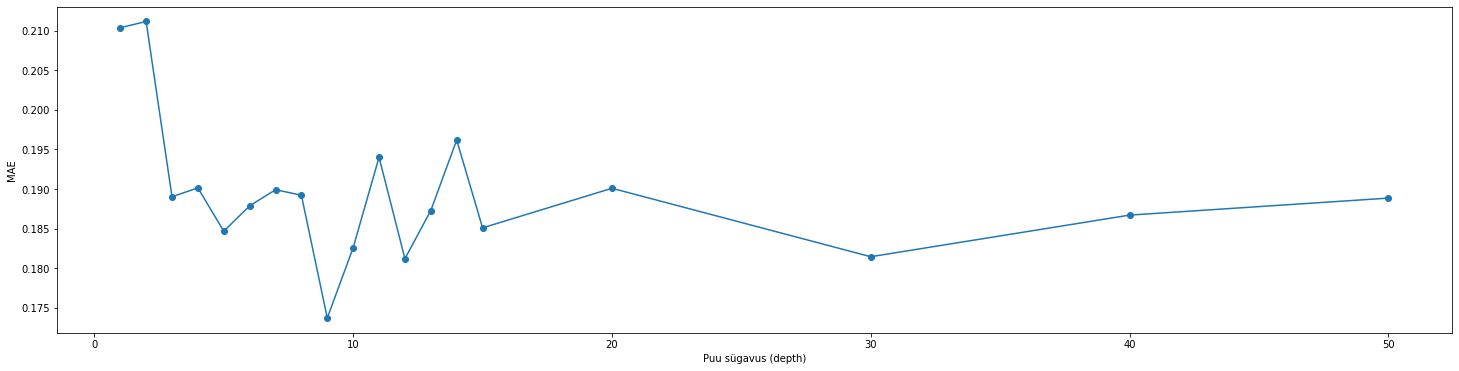

In [241]:
plt.figure(figsize=(25, 6))

plt.plot(max_depths, error, marker = 'o')
plt.xlabel('Puu sügavus (depth)')
plt.ylabel('MAE')

In [242]:
y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]
train_X, val_X, train_y, val_y = train_test_split(X_lr_2, y_lr_2,random_state=0, test_size = 0.20)

model_dt = DecisionTreeRegressor(max_depth = 5)
model_dt.fit(train_X, train_y)

predictions_dt = model_dt.predict(val_X)
mae_dt = mean_absolute_error(val_y, predictions_dt)

print(f'Decision Tree MAE is {mae_dt}.')

Decision Tree MAE is 0.2062939019074606.


In [243]:
# cross validation test

tuned_hyper_model= DecisionTreeRegressor(max_depth=5)

n_folds = 4
fold_MAEs = np.zeros(n_folds)

y = np.array(train_y_sel['y_imp_r3'].loc[8300:])
X = np.array(train_x_df.loc[8300:])

folds = KFold(n_splits=n_folds, shuffle=True, random_state=0)

folds.get_n_splits(X, y)

fold_indx = 1

for train_index, val_index in folds.split(X, y):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  tuned_hyper_model.fit(X_train, y_train)

  val_predictions = tuned_hyper_model.predict(X_val)
  fold_MAEs[fold_indx-1] = mean_absolute_error(y_val, val_predictions)

  fold_indx += 1

print(f'Average validation set MAE is {np.mean(fold_MAEs)}') 

Average validation set MAE is 0.18728290285562654


**Decision Tree tuning**

In [244]:
reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(train_X, train_y)
predictions_dt_2 = model_dt.predict(val_X)
mean_absolute_error(val_y, predictions_dt_2)

0.2062939019074606

In [245]:
reg_decision_model.score(train_X,train_y)

1.0

In [246]:
reg_decision_model.score(val_X,val_y)

0.060096907791916676

In [247]:
parameters={"splitter":["best","random"],
           "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [248]:
# up to 20 minutes!!!
y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]

reg_decision_model=DecisionTreeRegressor()

tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3,verbose=3) 
tuning_model.fit(X_lr_2, y_lr_2)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.294 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.264 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.228 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.294 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.293 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=3)

In [249]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [250]:
tuning_model.best_score_

-0.19805507534774322

In [251]:
# cross validation test

tuned_hyper_model= DecisionTreeRegressor(max_depth=6,max_features='auto',max_leaf_nodes=20,
                                         min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')

n_folds = 4
fold_MAEs = np.zeros(n_folds)

y = np.array(train_y_sel['y_imp_r3'].loc[8300:])
X = np.array(train_x_df.loc[8300:])

folds = KFold(n_splits=n_folds, shuffle=True, random_state=0)

folds.get_n_splits(X, y)

fold_indx = 1

for train_index, val_index in folds.split(X, y):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  tuned_hyper_model.fit(X_train, y_train)

  val_predictions = tuned_hyper_model.predict(X_val)
  fold_MAEs[fold_indx-1] = mean_absolute_error(y_val, val_predictions)

  fold_indx += 1

print(f'Average validation set MAE is {np.mean(fold_MAEs)}') 

Average validation set MAE is 0.2293851653314365


In [252]:
y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]
train_X, val_X, train_y, val_y = train_test_split(X_lr_2, y_lr_2,random_state=0, test_size = 0.20)

reg_decision_model=DecisionTreeRegressor(max_depth=6,max_features='auto',max_leaf_nodes=20,
                                         min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')
# fit independent varaibles to the dependent variables
reg_decision_model.fit(train_X, train_y)
predictions_dt_2 = model_dt.predict(val_X)
mean_absolute_error(val_y, predictions_dt_2)

0.2062939019074606

In [253]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=6,max_features='auto',max_leaf_nodes=20,
                                         min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')

tuned_hyper_model.fit(X_lr_2, y_lr_2)

test_y_predictions_dt_2 = tuned_hyper_model.predict(test_df)

In [254]:
submission_dt_r3_8300 = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_predictions_dt_2},
    columns = ['time', 'consumption'])
submission_dt_r3_8300.to_csv('submission_dt_r3_8300.csv', index = False)

*Kaggle*: 0.36449.

## Random Forest

In [255]:
nr_trees = [50, 100, 500, 750, 1000]

error = np.zeros(len(nr_trees))

y = np.array(train_y_sel['y_imp_r3'].loc[8300:])
X = np.array(train_x_df.loc[8300:])

for i, tree in enumerate(nr_trees):

  kf = KFold(n_splits=4, random_state=0, shuffle=True)

  fold_mae = []
  for train_index, val_index in kf.split(X):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = RandomForestRegressor(n_estimators = tree)

    model.fit(X_train, y_train) 

    predictions = model.predict(X_val)

    error_mae = mean_absolute_error(y_val, predictions)
    fold_mae.append(error_mae)

  print(f'Keskmine MAE {tree} puule on {np.mean(fold_mae)}')
  error[i] = np.mean(fold_mae)

Keskmine MAE 50 puule on 0.15150787671232877
Keskmine MAE 100 puule on 0.1570756278538812
Keskmine MAE 500 puule on 0.15551613698630157
Keskmine MAE 750 puule on 0.15535689954337906
Keskmine MAE 1000 puule on 0.15684947031963467


Text(0, 0.5, 'MAE')

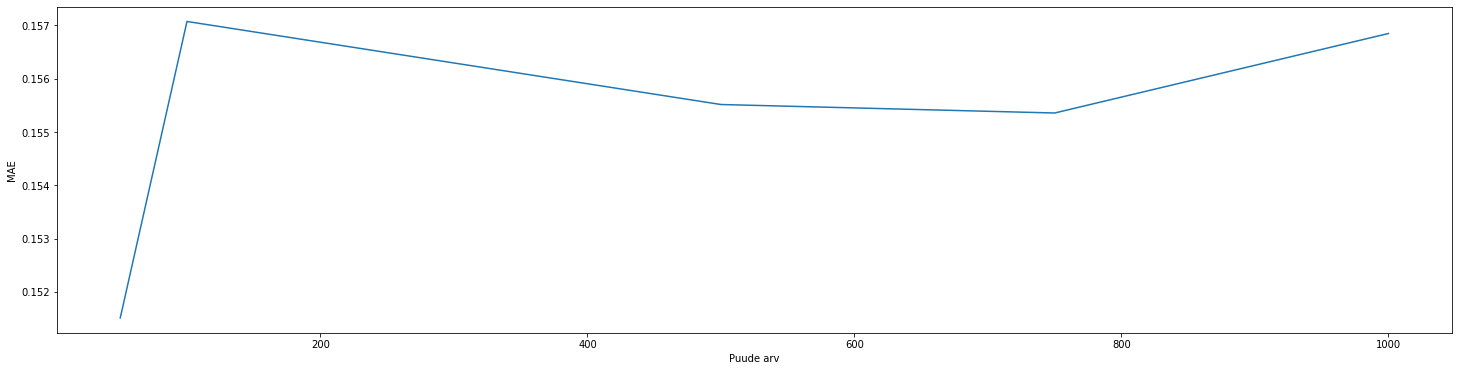

In [256]:
plt.figure(figsize=(25, 6))

plt.plot(nr_trees, error)
plt.xlabel('Puude arv')
plt.ylabel('MAE')

In [257]:
y_lr_2 = train_y_sel['y_imp_r3'].loc[8300:]
X_lr_2 = train_x_df.loc[8300:]
train_X, val_X, train_y, val_y = train_test_split(X_lr_2, y_lr_2,random_state=0, test_size = 0.20)

model_rf = RandomForestRegressor(n_estimators = 50)
model_rf.fit(train_X, train_y)

predictions_rf = model_rf.predict(val_X)
mae_rf = mean_absolute_error(val_y, predictions_rf) 

print(f'MAE Random Foresti is {mae_rf}')

MAE Random Foresti is 0.15824757062146885


In [258]:
model_rf = RandomForestRegressor(n_estimators=50)
model_rf.fit(X_lr_2, y_lr_2)

test_y_ennustused_rf = model_rf.predict(test_df)

In [259]:
submission_rf_r3_8300 = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_rf},
    columns = ['time', 'consumption'])
submission_rf_r3_8300.to_csv('submission_rf_r3_8300.csv', index = False)

Kaggle'i tulemuseks andis 0.40432.

# SIIT EDASI POLE VÄRSKENDANUD

**Random Forest tuunimine**

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 1000)
model_rf.fit(train_X, train_y)

predictions_rf = model_rf.predict(val_X)
mae_rf = mean_absolute_error(val_y, predictions_rf) 

print(f'MAE Random Foresti puhul on {mae_rf}')

MAE Random Foresti puhul on 0.2762556086111499


In [ ]:
# Get numerical feature importances
importances = list(model_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.28
Variable: hour                 Importance: 0.16
Variable: el_price             Importance: 0.1
Variable: pres                 Importance: 0.09
Variable: dwpt                 Importance: 0.05
Variable: wpgt                 Importance: 0.05
Variable: rhum                 Importance: 0.04
Variable: wdir                 Importance: 0.04
Variable: snow                 Importance: 0.02
Variable: wspd                 Importance: 0.02
Variable: dayname_Friday       Importance: 0.01
Variable: dayname_Saturday     Importance: 0.01
Variable: dayname_Sunday       Importance: 0.01
Variable: dayname_Thursday     Importance: 0.01
Variable: dayname_Tuesday      Importance: 0.01
Variable: dayname_Wednesday    Importance: 0.01
Variable: weekend_no           Importance: 0.01
Variable: weekend_yes          Importance: 0.01
Variable: season_Winter        Importance: 0.01
Variable: h_type_3_natday      Importance: 0.01
Variable: prcp                 Importance

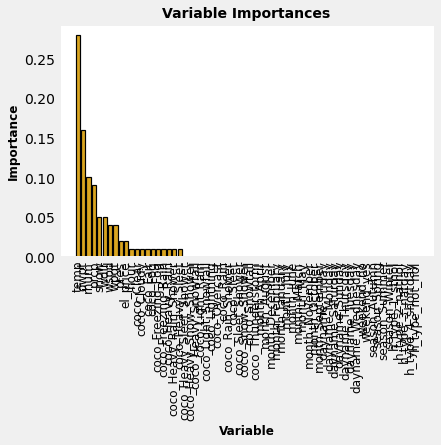

In [ ]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(feature_importances)))

y_values = []
for i in range(len(feature_importances)):
  y_value = feature_importances[i][1]
  y_values.append(y_value)

# Make a bar chart
plt.bar(x_values, y_values, orientation = 'vertical', color = 'goldenrod', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_X, rotation='vertical', fontsize = 12)

# Axis labels and title
plt.ylabel('Importance', fontweight = 'bold', fontsize = 12)
plt.xlabel('Variable', fontweight = 'bold', fontsize = 12)
ax = plt.axes()
ax.set_facecolor("white")

plt.title('Variable Importances', fontweight = 'bold', fontsize = 14);
plt.grid(b=None)
#plt.savefig('feat_imp.png', bbox_inches = 'tight', facecolor='white')

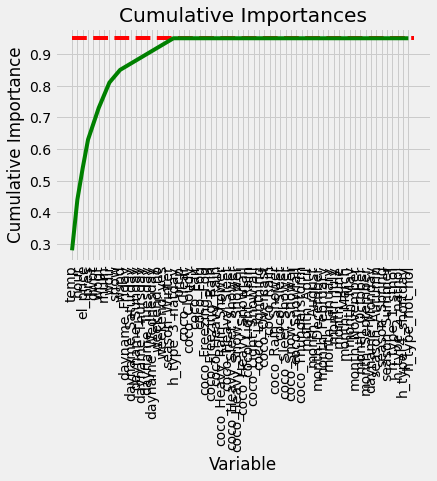

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 20


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:20]]
important_feature_names

['temp',
 'hour',
 'el_price',
 'pres',
 'dwpt',
 'wpgt',
 'rhum',
 'wdir',
 'snow',
 'wspd',
 'dayname_Friday',
 'dayname_Saturday',
 'dayname_Sunday',
 'dayname_Thursday',
 'dayname_Tuesday',
 'dayname_Wednesday',
 'weekend_no',
 'weekend_yes',
 'season_Winter',
 'h_type_3_natday']

In [ ]:
train_X_imp = train_X[train_X.columns.intersection(important_feature_names)]
val_X_imp = val_X[val_X.columns.intersection(important_feature_names)]

In [ ]:
# Sanity check on operations
print('Important train features shape:', train_X_imp.shape)
print('Important test features shape:', val_X_imp.shape)

Important train features shape: (6873, 20)
Important test features shape: (1719, 20)


In [ ]:
model_rf_exp = RandomForestRegressor(n_estimators = 1000)
model_rf_exp.fit(train_X_imp, train_y)

predictions_rf_exp = model_rf_exp.predict(val_X_imp)
mae_rf_imp = mean_absolute_error(val_y, predictions_rf_exp) 

print(f'MAE Random Foresti puhul oli täisandmete {mae_rf} ja tähtsate atribuutidega {mae_rf_imp}.')

MAE Random Foresti puhul oli täisandmete 0.2762556086111499 ja tähtsate atribuutidega 0.28140398323357285.


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
### NB! Seevõttis aega 51 minutit!
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X_imp, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=0, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
# See läks 9 minutit
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [900, 950, 1000, 1050, 1100]
}

# Create a base model
rf = RandomForestRegressor(random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_absolute_error', 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(train_X_imp, train_y);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 950}

In [ ]:
model_rf_2 = RandomForestRegressor(n_estimators = 950, bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
model_rf_2.fit(train_X, train_y)

predictions_rf_2 = model_rf_2.predict(val_X)
mae_rf_2 = mean_absolute_error(val_y, predictions_rf_2) 

print(f'MAE Random Foresti puhul oli default (v.a. n_estimators 500) {mae_rf} ja tuunituna {mae_rf_2}.')

MAE Random Foresti puhul oli default (v.a. n_estimators 500) 0.46043132751599775 ja tuunituna 0.44467373197391374.


In [ ]:
model_rf = RandomForestRegressor(n_estimators = 950, bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
model_rf.fit(X_lr, y_lr)

test_y_ennustused_rf = model_rf.predict(test_df)

In [ ]:
submission_rf_2 = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_rf},
    columns = ['time', 'consumption'])
submission_rf_2.to_csv('submission_rf_2.csv', index = False)

Kaggle: 0.48919.

**XGBoost and basic tuning**

In [ ]:
# läks ca 11 minutit
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed=0)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)
clf.fit(train_X, train_y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[20:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:19] WARNING: /workspace/src/objective/regr

GridSearchCV(estimator=XGBRegressor(seed=0),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Best parameters:", clf.best_params_)
print("Lowest MAE: ", (-clf.best_score_))

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}
Lowest MAE:  0.470058894692979


In [ ]:
# teine katse 40 minutit
params = { 'max_depth': [10, 13, 16],
           'learning_rate': [0.01, 0.02, 0.03],
           'n_estimators': [400, 500, 600],
           'colsample_bytree': [0.7, 0.9]}
xgbr = xgb.XGBRegressor(seed=0)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)
clf.fit(train_X, train_y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[20:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:27] WARNING: /workspace/src/objective/regr

GridSearchCV(estimator=XGBRegressor(seed=0),
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [10, 13, 16],
                         'n_estimators': [400, 500, 600]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Best parameters:", clf.best_params_)
print("Lowest MAE: ", (-clf.best_score_))

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}
Lowest MAE:  0.46797082904900283


In [ ]:
model_xgbr = xgb.XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.01, max_depth = 10, n_estimators = 400, seed=0)

model_xgbr.fit(X_lr, y_lr)

test_y_ennustused_xgbr = model_xgbr.predict(test_df)

[21:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
submission_xgbr = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_ennustused_xgbr},
    columns = ['time', 'consumption'])
submission_xgbr.to_csv('submission_xgbr.csv', index = False)

Kaggle: 0.62141. Aeg pinsile minna.